In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=94c3a605ded3ee481f394463b6a27bba238d9439203aceb58bc7f33c89e3d519
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [19]:
import pandas as pd
import psutil
import time
from pyspark.sql.functions import col, percentile_approx

In [3]:
# Create an empty dictionary to store process details
meta_list = {}

def add_process(name, runtime, memory):
  meta_list[name] = {"runtime": runtime, "memory": memory}


In [4]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName('SPARK_MODEL').getOrCreate()

# Load dataset into Spark DataFrame (replace 'file_path' with your dataset's path)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/05 17:35:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
def add_process(name, runtime, memory):
    meta_list[name] = {"runtime": runtime, "memory": memory}

# Function to measure memory usage
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss

In [28]:


start_time = time.time()

# Initialize PySpark session

# Load your dataset into a PySpark DataFrame (Replace 'your_dataset_path' with your actual dataset path)
a = spark.read.csv('/kaggle/input/adhd-data/Labelled/ADHD_NEGATIVE.csv', header=True, inferSchema=True)
b = spark.read.csv('/kaggle/input/adhd-data/Labelled/ADHD_POSITIVE.csv', header=True, inferSchema=True)

df = a.union(b)

# Calculate runtime
end_time = time.time()
runtime = end_time - start_time

# Measure memory usage after loading data into PySpark
memory_usage = get_memory_usage()

# Add data loading process to the meta list
add_process("Data Loading", runtime, memory_usage)

print('Runtime: ',runtime)
print('Memory_usage: ',memory_usage)

Runtime:  7.368777513504028
Memory_usage:  276254720


<Figure size 600x400 with 0 Axes>

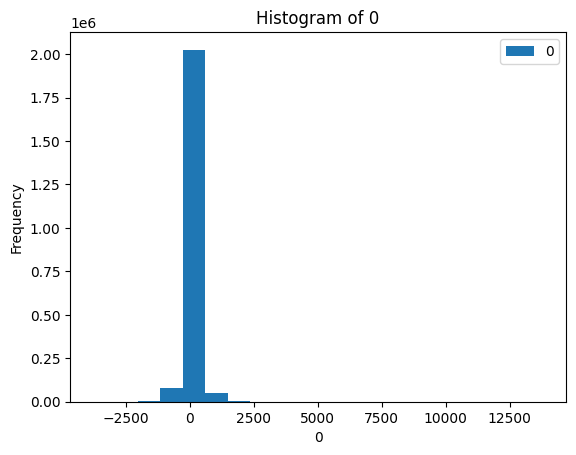

<Figure size 600x400 with 0 Axes>

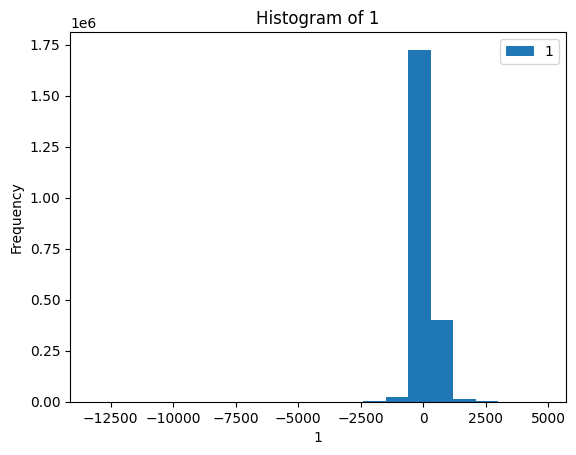

<Figure size 600x400 with 0 Axes>

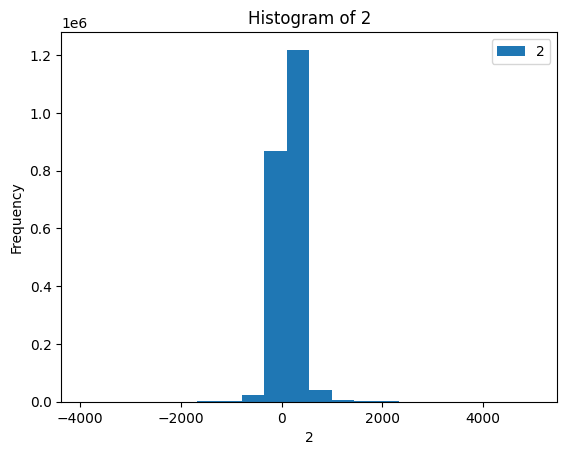

<Figure size 600x400 with 0 Axes>

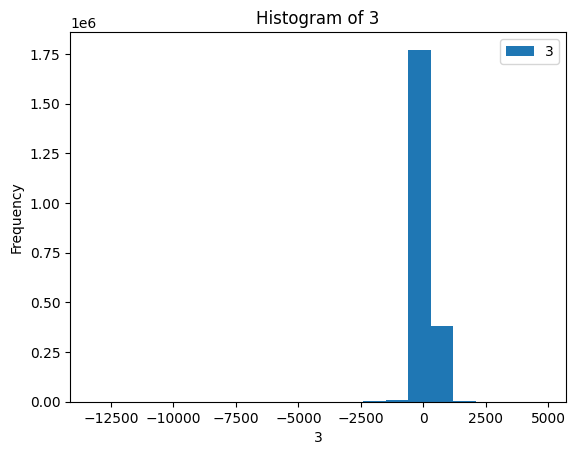

<Figure size 600x400 with 0 Axes>

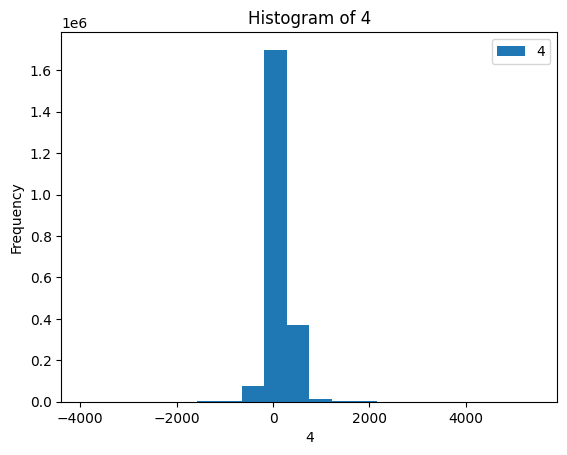

<Figure size 600x400 with 0 Axes>

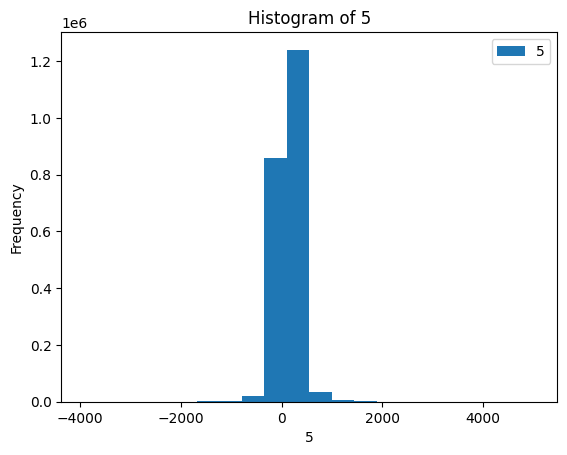

<Figure size 600x400 with 0 Axes>

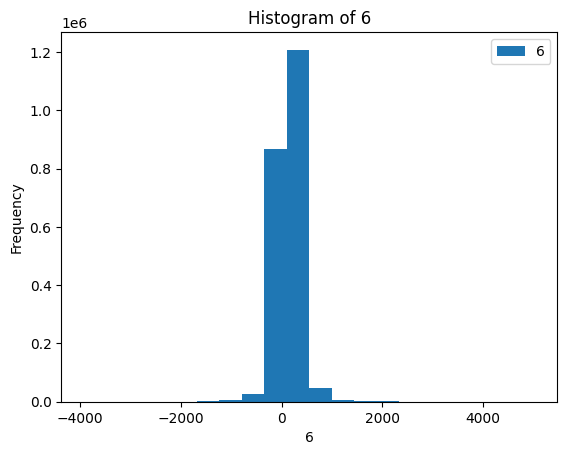

<Figure size 600x400 with 0 Axes>

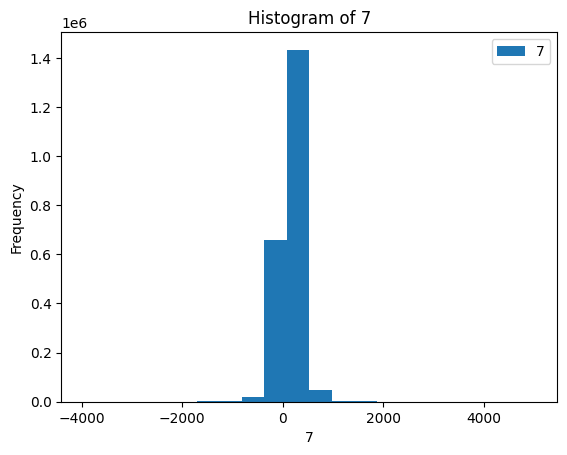

<Figure size 600x400 with 0 Axes>

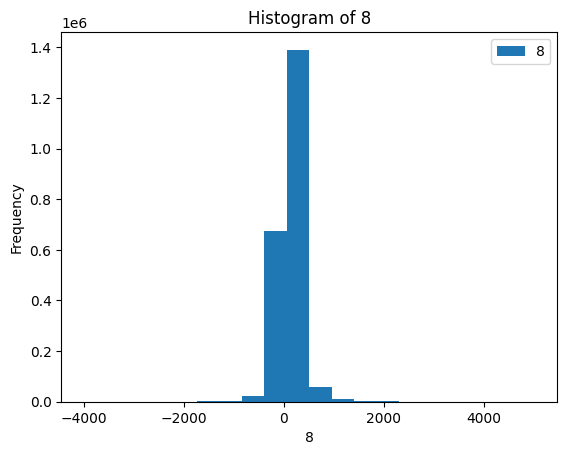

<Figure size 600x400 with 0 Axes>

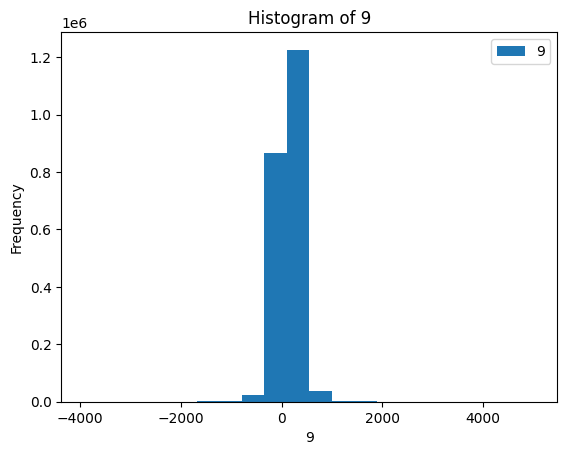

<Figure size 600x400 with 0 Axes>

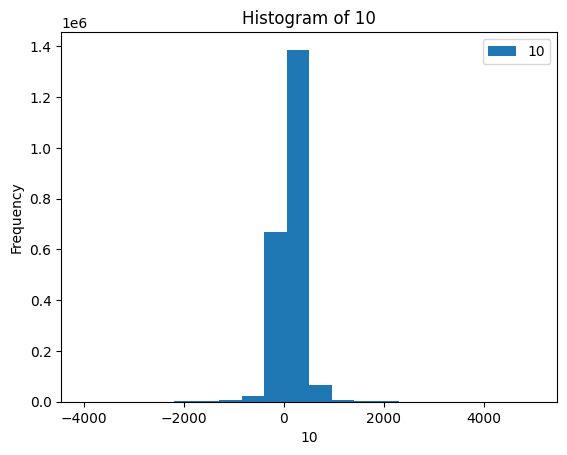

<Figure size 600x400 with 0 Axes>

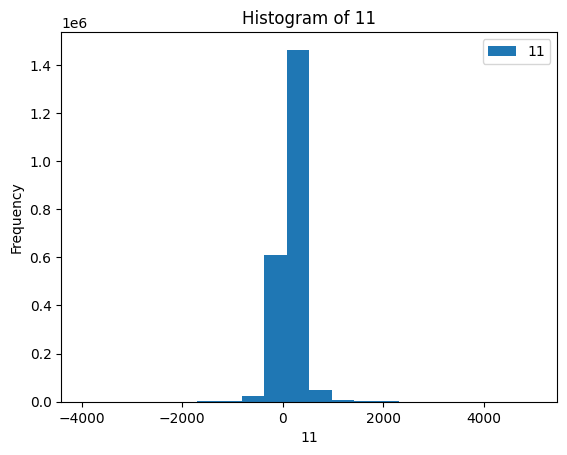

<Figure size 600x400 with 0 Axes>

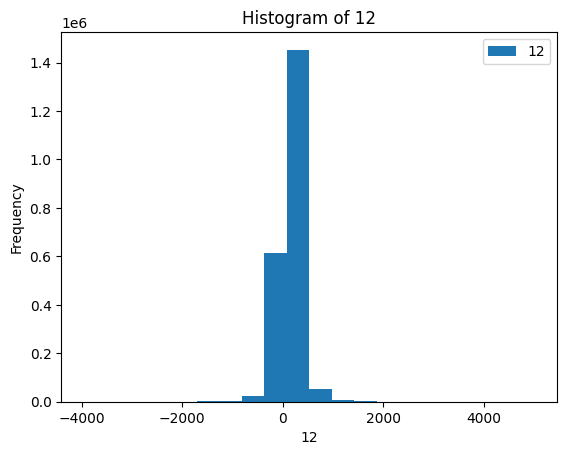

<Figure size 600x400 with 0 Axes>

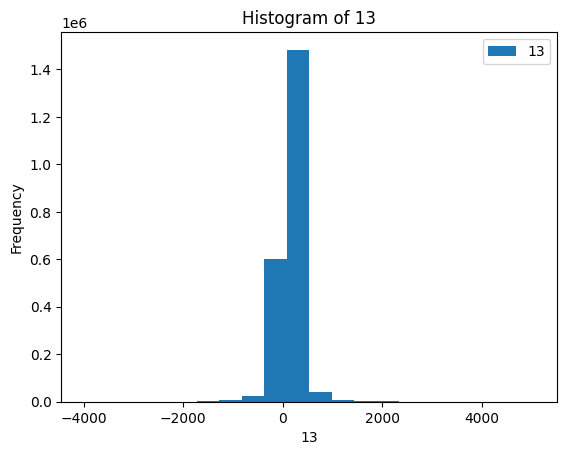

<Figure size 600x400 with 0 Axes>

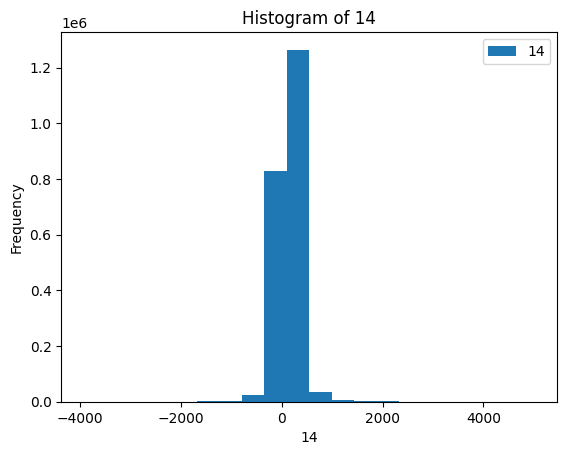

<Figure size 600x400 with 0 Axes>

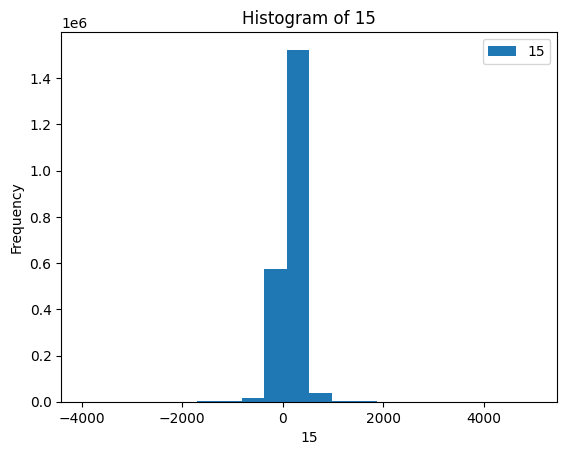

<Figure size 600x400 with 0 Axes>

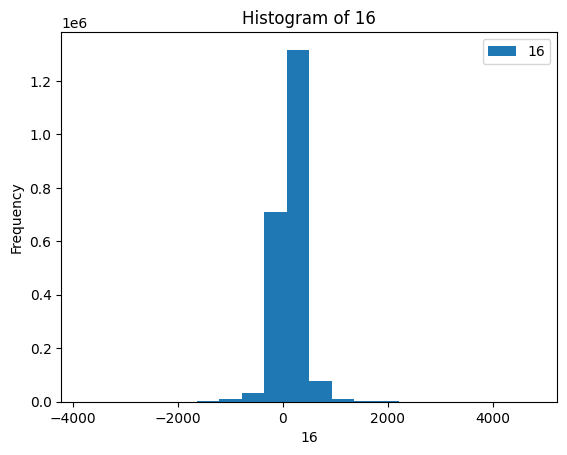

<Figure size 600x400 with 0 Axes>

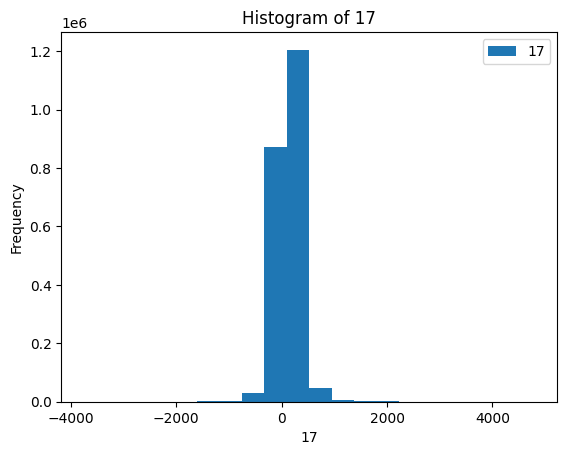

<Figure size 600x400 with 0 Axes>

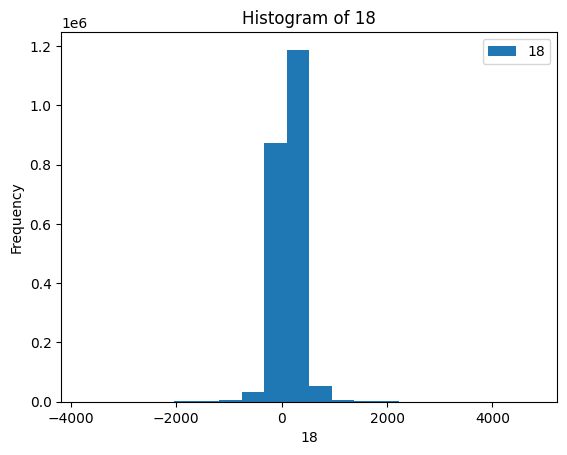

<Figure size 600x400 with 0 Axes>

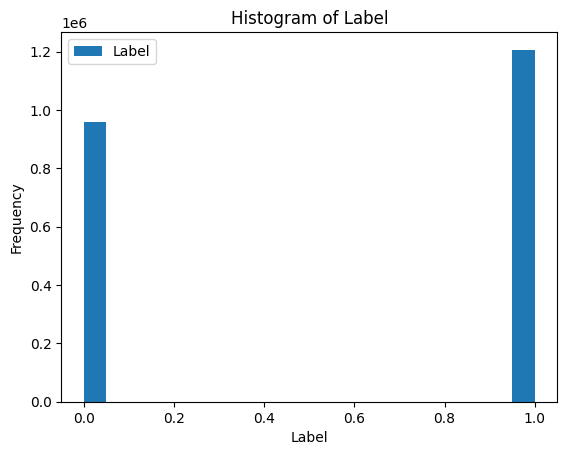

Runtime:  286.3494338989258
Memory_usage:  374317056


In [29]:
# Calculating statistical measures for PySpark DataFrame
start_time = time.time()

describe_pyspark = df.describe().toPandas()

# Visualizing data distribution with histograms for PySpark DataFrame
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(6, 4))
    df.select(col).toPandas().plot(kind='hist', bins=20, title=f'Histogram of {col}')
    plt.xlabel(col)
    plt.show()
    
end_time = time.time()
runtime = end_time - start_time

# Measure memory usage after loading data into PySpark
memory_usage = get_memory_usage()

add_process("Histogram Distrubution", runtime, memory_usage)

print('Runtime: ',runtime)
print('Memory_usage: ',memory_usage)

In [23]:
# Assuming 'df' is your PySpark DataFrame
df = df.withColumnRenamed("Label", "label")


In [25]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

# Calculating statistical measures for PySpark DataFrame
start_time = time.time()

feature_columns = df.columns[:-1]  # Assuming the last column is the target
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Define the layers for the neural network
input_size = len(feature_columns)
output_size = 2  # Number of output classes (adjust based on your dataset)
hidden_layers = [input_size, 64, 32, output_size]  # Adjust the hidden layers as needed

# Initialize the Multilayer Perceptron Classifier
mlp = MultilayerPerceptronClassifier(layers=hidden_layers, maxIter=5, seed=42)

# Create a pipeline for assembling features and training the neural network model
pipeline = Pipeline(stages=[assembler, mlp])

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Train the neural network model
nn_model = pipeline.fit(train_data)

    
end_time = time.time()
runtime = end_time - start_time

# Measure memory usage after loading data into PySpark
memory_usage = get_memory_usage()

add_process("Training the model", runtime, memory_usage)

print('Runtime: ',runtime)
print('Memory_usage: ',memory_usage)


Runtime:  62.556658029556274
Memory_usage:  276254720


In [26]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Assuming 'nn_model' is the trained neural network model in PySpark
# 'test_data' is the PySpark DataFrame containing test samples

# Make predictions on the test data
predictions = nn_model.transform(test_data)

# Select the prediction and label columns for evaluation
predictions = predictions.select("prediction", "label")

# Initialize MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# Calculate accuracy on the test data
accuracy = evaluator.evaluate(predictions)
print("Accuracy - PySpark Neural Network:", accuracy)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Assuming 'nn_model' is the trained neural network model in PySpark
# 'test_data' is the PySpark DataFrame containing test samples

# Make predictions on the test data
predictions = nn_model.transform(test_data)

# Select the prediction and label columns for evaluation
predictions = predictions.select("prediction", "label")

# Initialize MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# Calculate accuracy on the test data
accuracy = evaluator.evaluate(predictions)
print("Accuracy - PySpark Neural Network:", accuracy)


Accuracy - PySpark Neural Network: 0.5853091295410979


Accuracy - PySpark Neural Network: 0.5853091295410979


In [40]:
meta_df = pd.DataFrame.from_dict(meta_list, orient='index')

# Save the DataFrame to a CSV file
meta_df.to_csv('meta_data.csv')